In [1]:
from source_code import utils

train_matrix, train_labels = utils.get_dataset('BME', 'train')
test_matrix, test_labels = utils.get_dataset('BME', 'test')

Sparsity=2:
  Train classification error: 0.17
  Train L2 error: 49.52

  Test classification error: 0.36
  Test L2 error: 304.26


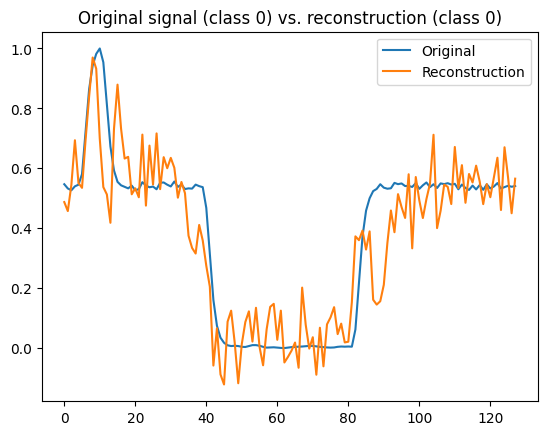

Sparsity=5:
  Train classification error: 0.00
  Train L2 error: 22.31

  Test classification error: 0.14
  Test L2 error: 196.44


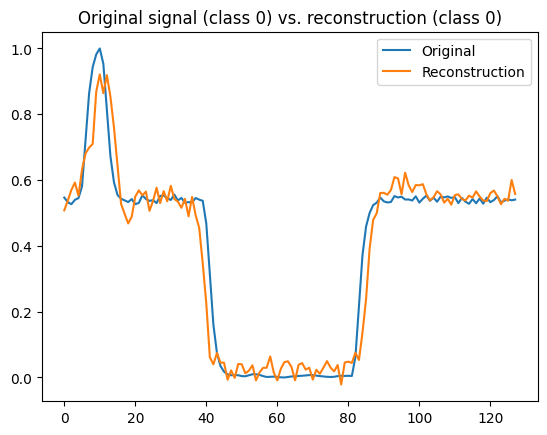

Sparsity=10:
  Train classification error: 0.33
  Train L2 error: 24.25

  Test classification error: 0.35
  Test L2 error: 182.79


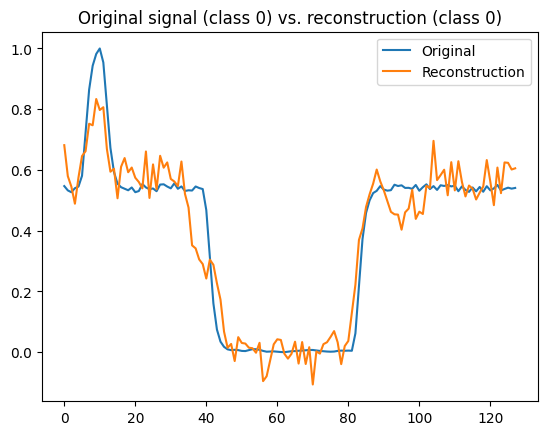

In [2]:
from source_code.models import kSVD
import numpy as np

i = np.random.randint(0, test_matrix.shape[1])
x = test_matrix[:, i]
y = test_labels[i]
 
for sparsity in [2, 5, 10]:
    print(f'Sparsity={sparsity}:')
    model = kSVD(n_classes=3).fit(train_matrix, train_labels, sparsity=sparsity)

    train_classif_error, train_l2_error = utils.evaluate_classif(model, train_matrix, train_labels, sparsity=sparsity)
    test_classif_error, test_l2_error = utils.evaluate_classif(model, test_matrix, test_labels, sparsity=sparsity)

    print(f'  Train classification error: {train_classif_error:.2f}')
    print(f'  Train L2 error: {train_l2_error:.2f}\n')
    print(f'  Test classification error: {test_classif_error:.2f}')
    print(f'  Test L2 error: {test_l2_error:.2f}')

    utils.plot_example(x, y, model, sparsity)

    model_name = f'kSVD_BME_sparsity_{sparsity}'
    utils.save_model(model, model_name)